## **Aim**: Simple Linear Regression in Python

### Implementation in Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing data
df = pd.read_csv('./mi_csk.csv')
df.head()

,match_id,mi_batting,inning,over,ball,total_runs,team_score
0,1,0,1,1,1,1,1
1,1,0,1,1,2,0,1
2,1,0,1,1,3,0,1
3,1,0,1,1,4,0,1
4,1,0,1,1,5,4,5


In [ ]:
df_filtered = df[df['match_id'] == 10]
df_filtered.head()

,match_id,mi_batting,inning,over,ball,total_runs,team_score
2205,10,0,1,1,1,4,4
2206,10,0,1,1,2,0,4
2207,10,0,1,1,3,0,4
2208,10,0,1,1,4,2,6
2209,10,0,1,1,5,0,6


In [ ]:
team_totals = df_filtered.groupby(['mi_batting', 'inning', 'over'])['team_score'].max().reset_index()
team_totals.head()

,mi_batting,inning,over,team_score
0,0,1,1,7
1,0,1,2,15
2,0,1,3,18
3,0,1,4,22
4,0,1,5,46


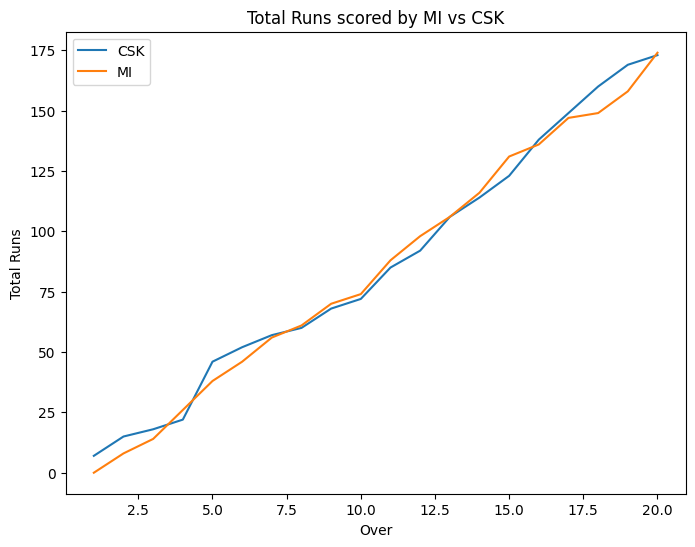

In [ ]:
mi_batting_0 = team_totals[team_totals['mi_batting'] == 0]
mi_batting_1 = team_totals[team_totals['mi_batting'] == 1]

# Plot the line graph
plt.figure(figsize=(8, 6))
plt.plot(mi_batting_0['over'], mi_batting_0['team_score'], label='CSK')
plt.plot(mi_batting_1['over'], mi_batting_1['team_score'], label='MI')

# Set plot labels and title
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Total Runs scored by MI vs CSK')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Merge data for mi_batting values 0 and 1 to create features and target variable
features = pd.concat([mi_batting_0[['inning', 'over']], mi_batting_1[['inning', 'over']]])
target = pd.concat([mi_batting_0['team_score'], mi_batting_1['team_score']])

# Convert to 2D arrays
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20.920761892334028


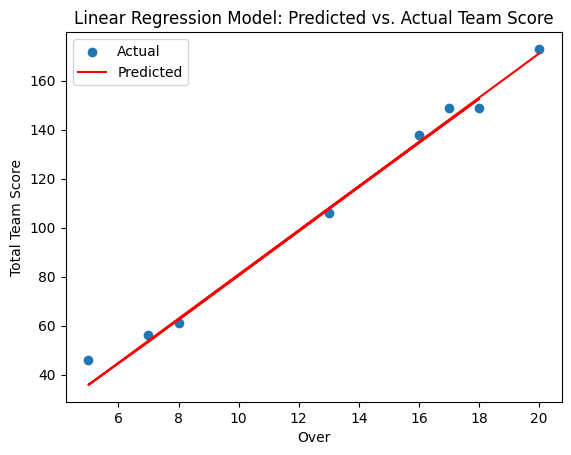

In [ ]:
plt.scatter(X_test['over'], y_test, label='Actual')
plt.plot(X_test['over'], y_pred, label='Predicted', color='red')
plt.xlabel('Over')
plt.ylabel('Total Team Score')
plt.title('Linear Regression Model: Predicted vs. Actual Team Score')
plt.legend()
plt.show()

### Implementation in R


In [ ]:
# Install and load necessary packages
library(tidyverse)
# library(caret)
library(dplyr)
library(broom)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
df <- read.csv("mi_csk.csv")
head(df)

,match_id,mi_batting,inning,over,ball,total_runs,team_score
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,1,1,1,1
2,1,0,1,1,2,0,1
3,1,0,1,1,3,0,1
4,1,0,1,1,4,0,1
5,1,0,1,1,5,4,5
6,1,0,1,1,6,0,5


In [ ]:
df_filtered <- df[df$match_id == 10, ]
head(df_filtered)

,match_id,mi_batting,inning,over,ball,total_runs,team_score
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2206,10,0,1,1,1,4,4
2207,10,0,1,1,2,0,4
2208,10,0,1,1,3,0,4
2209,10,0,1,1,4,2,6
2210,10,0,1,1,5,0,6
2211,10,0,1,1,6,1,7


In [ ]:
team_totals <- df_filtered %>%
  group_by(mi_batting, inning, over) %>%
  summarise(team_score = max(team_score)) %>%
  ungroup()

head(team_totals)

`summarise()` has grouped output by 'mi_batting', 'inning'. You can override
using the `.groups` argument.


mi_batting,inning,over,team_score
<int>,<int>,<int>,<int>
0,1,1,7
0,1,2,15
0,1,3,18
0,1,4,22
0,1,5,46
0,1,6,52


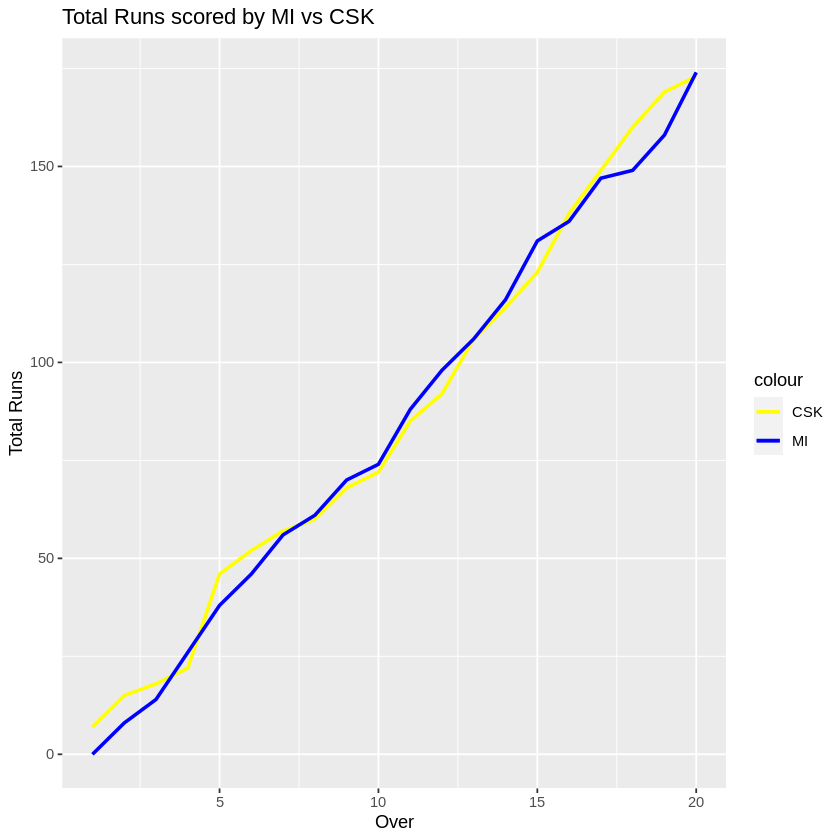

In [ ]:
mi_batting_0 <- team_totals[team_totals$mi_batting == 0, ]
mi_batting_1 <- team_totals[team_totals$mi_batting == 1, ]

# Plot the line graph
ggplot() +
  geom_line(data = mi_batting_0, aes(x = over, y = team_score, color = "CSK"), size = 1) +
  geom_line(data = mi_batting_1, aes(x = over, y = team_score, color = "MI"), size = 1) +
  labs(x = "Over", y = "Total Runs", title = "Total Runs scored by MI vs CSK") +
  scale_color_manual(values = c("CSK" = "yellow", "MI" = "blue"))



In [ ]:
# Merge data for mi_batting values 0 and 1 to create features and target variable
features <- rbind(mi_batting_0[c('inning', 'over')],
                  mi_batting_1[c('inning', 'over')])
target <- c(mi_batting_0$team_score, mi_batting_1$team_score)

In [ ]:
# Set seed for reproducibility
set.seed(42)

# Create an index for data splitting
splitIndex <- sample(1:nrow(features), 0.8 * nrow(features))

# Split the data into training and testing sets
X_train <- features[splitIndex, , drop = FALSE]
X_test <- features[-splitIndex, , drop = FALSE]
y_train <- target[splitIndex]
y_test <- target[-splitIndex]


In [ ]:
# Train a linear regression model
model <- lm(y_train ~ ., data = X_train)

In [ ]:
# Predict the target variable on the test set
y_pred <- predict(model, newdata = X_test)


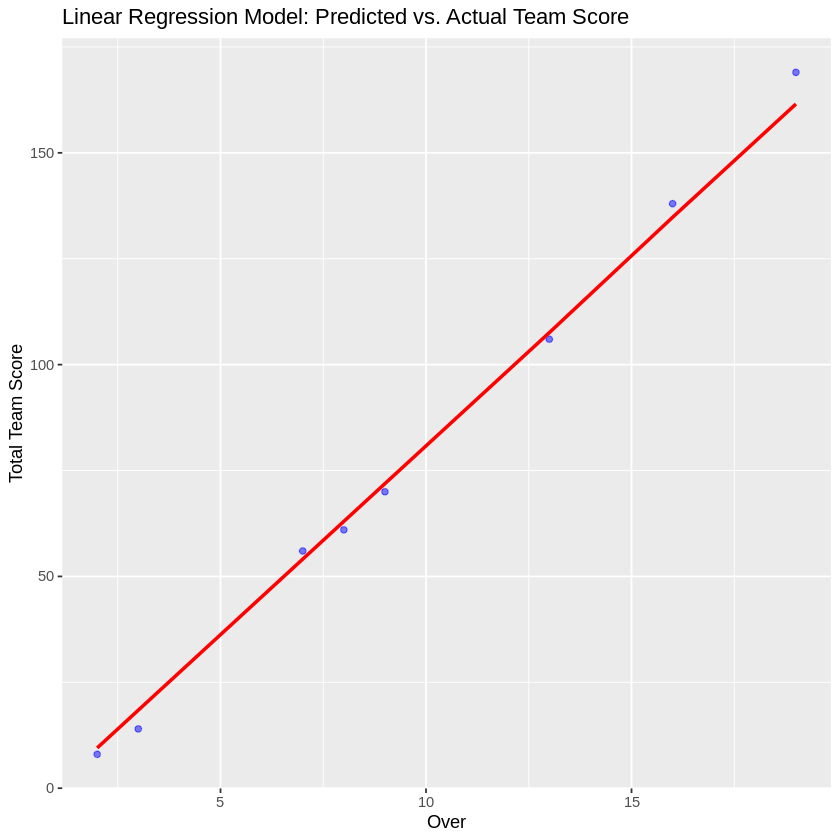

In [ ]:
ggplot() +
  geom_point(aes(x = X_test$over, y = y_test), color = "blue", alpha = 0.5) +
  geom_line(aes(x = X_test$over, y = y_pred), color = "red", size = 1) +
  labs(x = "Over", y = "Total Team Score", title = "Linear Regression Model: Predicted vs. Actual Team Score")